Task 2: Curve fitting

In [14]:
#!/usr/bin/env python
# vim: set fileencoding=utf-8 :
# By AB
# Library imports
# ============================================================================

import re
import os, sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# change the font size and tick pad
plt.rc('mathtext', fontset='stixsans')

plt.rcParams['xtick.major.pad'] = 25
plt.rcParams['ytick.major.pad'] = 25

plt.rcParams.update({'font.size' : 45})
font = {'fontsize'   : 45}
font1 = {'fontsize'   : 45}

In [15]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/andres2085/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Task 2: Curve fitting
Task 2.1: Fitting an exponential decay

Read the data from the file decaydata.dat and fit an exponential decay function

$$f(t)=a⋅e−b⋅t+c$$

to the data1 and data2 columns. For each of the two data sets, plot the resulting curve and the data points.

Investigate if using the measurement errors (colum err in the data file) in the fit influences the results, and compare the resulting curves. How does the RMSE (the root of the average squared deviations of the fitted function from the data, $\sqrt(∑(f(t_{i})−y_{i})^2 /n)$ change


In [16]:
#import urllib
data_file = "/home/andres2085/Downloads/decaydata.dat"
names = ['#t', 'data1', 'data2', 'error']
df_decay = pd.read_csv(data_file, comment='#', sep=' ', index_col=False, 
                       header=None, skipinitialspace=True, names = names)# header= 0
df_decay.head()

,#t,data1,data2,error
0,0.00,5.846345,5.892226,0.513997
1,0.05,4.943104,4.812966,0.576115
2,0.10,4.705084,4.975271,0.424172
3,0.15,4.794310,5.028866,0.388261
4,0.20,4.484522,4.525377,0.504550


In [17]:
import scipy as sp
import scipy.optimize

def model_func(t, A, K, C):
    return A * np.exp(-K * t) + C

def fit_exp_nonlinear(t, y):
    opt_parms, parm_cov = sp.optimize.curve_fit(model_func, t, y)
    A, K, C = opt_parms
    return A, K, C
try:
    a,b,c = fit_exp_nonlinear(df_decay["#t"],df_decay["data1"])
    d,e,f = fit_exp_nonlinear(df_decay["#t"],df_decay["data2"])
except RuntimeError:
    print("Error - curve_fit failed")
    print(a,b,c)
    print(d,e,f)
    
#def plot(ax, t, y, fit_y, orig_parms, fit_parms):
#    A0, K0, C0 = orig_parms
#    A, K, C = fit_parms

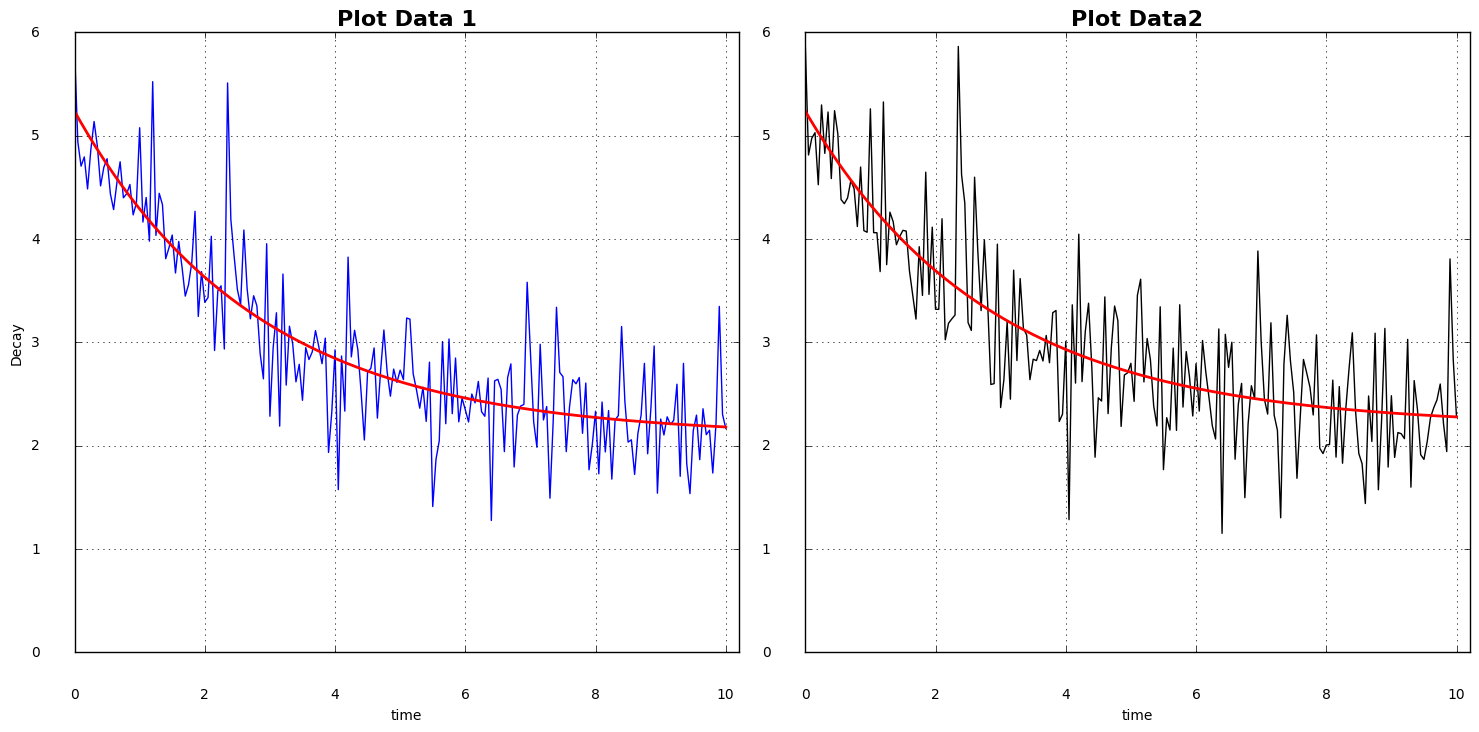

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8), subplot_kw=dict())
fig.subplots_adjust(wspace=0.10)

ax[0].plot(df_decay['#t'], df_decay['data1'], "b-", lw=1)
ax[0].plot(df_decay["#t"], model_func(df_decay["#t"], a,b,c), "r", lw=2)
ax[0].set_ylabel('Decay')
ax[0].set_xlabel('time')
ax[0].set_title("Plot Data 1", size=16, fontweight='bold')
ax[0].set_ylim(0.0, 6)
ax[0].set_xlim(0.0, 10.2)
ax[0].grid()

ax[1].plot(df_decay['#t'], df_decay['data2'], "k-", lw=1)
ax[1].plot(df_decay["#t"], model_func(df_decay["#t"], d,e,f), "r", lw=2)
ax[1].set_title('Plot Data2', size=16, fontweight='bold');
ax[1].set_ylim(0.0, 6)
ax[1].set_xlim(0.0, 10.2)
ax[1].set_xlabel('time')
ax[1].grid()

plt.show();